<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
#  y_train[4], x_train[4],
y_train[50000], x_train[50000]

3 <class 'numpy.uint8'>


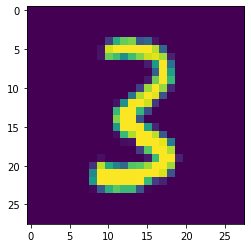

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [ ]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [ ]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model 

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 --> softmax, binary --> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer 

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

# evaluation

In [ ]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

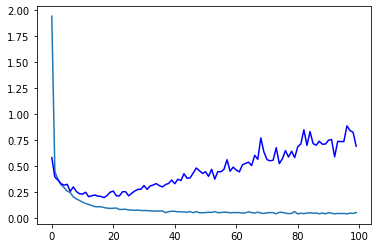

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

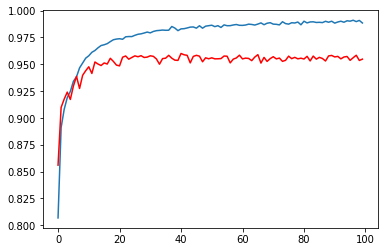

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [ ]:
y_test[30]

3

In [ ]:
model.predict(x_test[30,:])